In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\91955\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


(4340, 8)

In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.duplicated().sum()

763

In [6]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [8]:
df['year'].value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

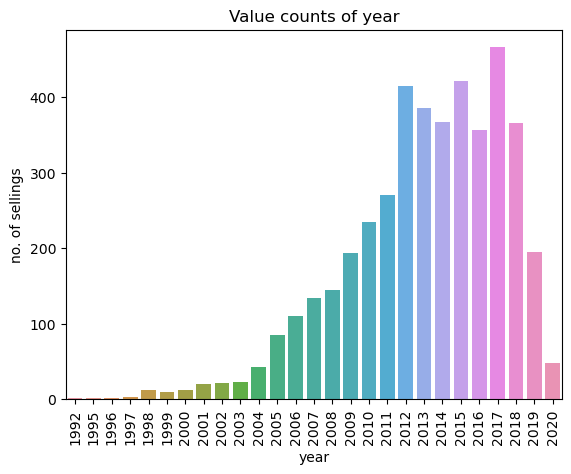

In [26]:

sns.barplot(x=df['year'].value_counts().index,y=df['year'].value_counts().values)
plt.xlabel('year')
plt.ylabel('no. of sellings')
plt.title('Value counts of year')
plt.xticks(rotation=90)
plt.show()

In [10]:
df['name'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [11]:
def car_make(text):    
    # Extract the first word (make) from the text
    make = text.split()[0]
    
    # List of recognized car makes
    car_makes = [
        'Hyundai', 'Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda', 'Mahindra', 'Mitsubishi'
        'Mercedes', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Maruti', 'Ambassador', 'Land'
    ]
    
    # Check if the first word is in the list of car makes
    if make in car_makes:
        return make
    else:
        return 'Other Cars'


In [12]:
df['name']=df['name'].apply(car_make)

In [13]:
df['name'].value_counts()

Maruti        1280
Hyundai        821
Mahindra       365
Tata           361
Honda          252
Ford           238
Toyota         206
Chevrolet      188
Renault        146
Volkswagen     107
Skoda           68
Nissan          64
Other Cars      62
Audi            60
BMW             39
Fiat            37
Datsun          37
Land             5
Ambassador       4
Name: name, dtype: int64

In [14]:
df.rename(columns={'name': 'car_make'}, inplace=True)

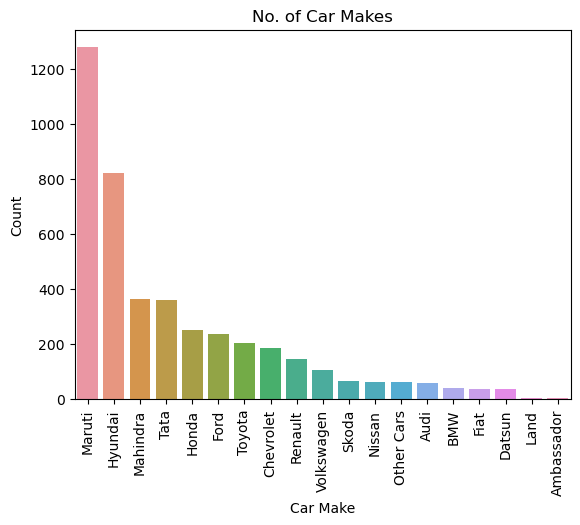

In [38]:
car_make_value_counts = df['car_make'].value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=car_make_value_counts.index, y=car_make_value_counts.values)

# Set labels and title
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('No. of Car Makes')
plt.xticks(rotation=90)
plt.show()

### Maruti is likely the first choice of indian People

In [79]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [77]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

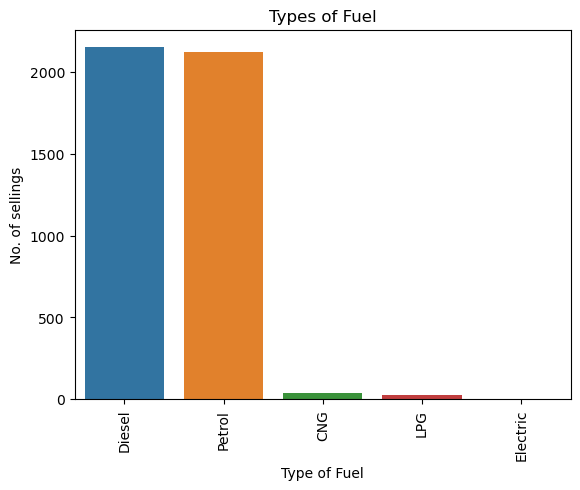

In [36]:

sns.barplot(x=df['fuel'].value_counts().index,y=df['fuel'].value_counts().values)
plt.xlabel('Type of Fuel')
plt.ylabel('No. of sellings')
plt.title('Types of Fuel')
plt.xticks(rotation=90)
plt.show()

### People prefer to use Diesel cars over electric

In [81]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

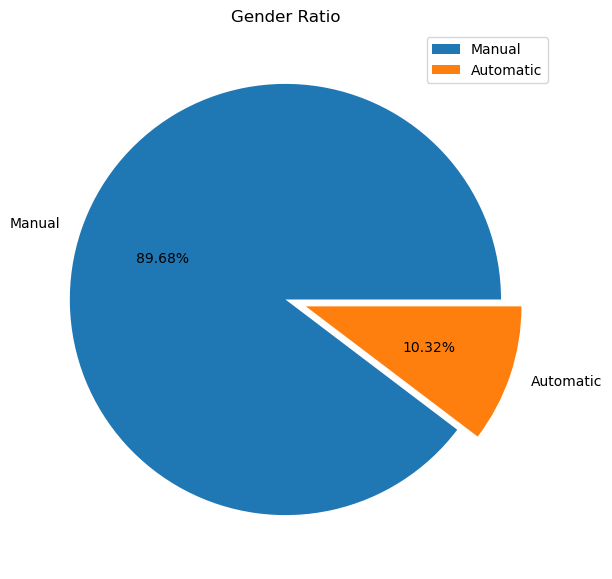

In [66]:
plt.figure(figsize=(7,7))
size=df['transmission'].value_counts()
plt.pie(size,explode=[0,0.1],labels=['Manual','Automatic'],autopct='%.2f%%')
plt.title('Gender Ratio')
plt.legend()
plt.show()

### 90% Population prefer using Manual Transmission over Automatic Transmission

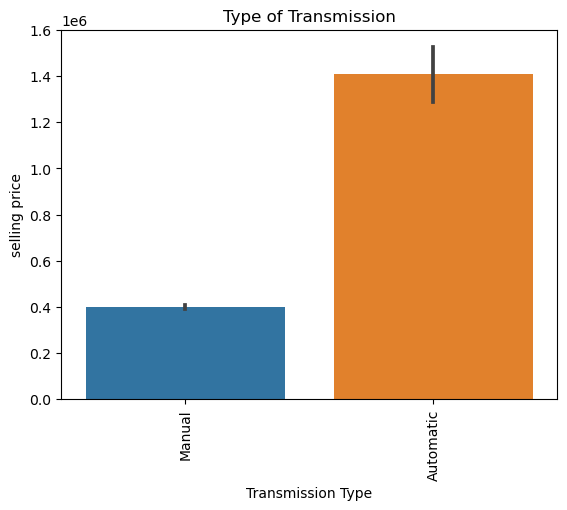

In [65]:

sns.barplot(x=df['transmission'],y=df['selling_price'])
plt.xlabel('Transmission Type')
plt.ylabel('selling price')
plt.title('Type of Transmission')
plt.xticks(rotation=90)
plt.show()

### Selling price of Automatic cars is comparatively very high to Manual transmission cars

In [94]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

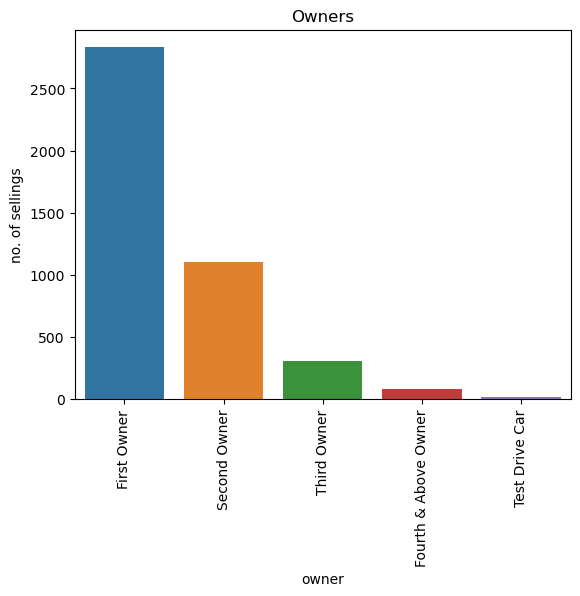

In [33]:

sns.barplot(x=df['owner'].value_counts().index,y=df['owner'].value_counts().values)
plt.xlabel('owner')
plt.ylabel('no. of sellings')
plt.title('Owners')
plt.xticks(rotation=90)
plt.show()

### People preferes to use first hand cars

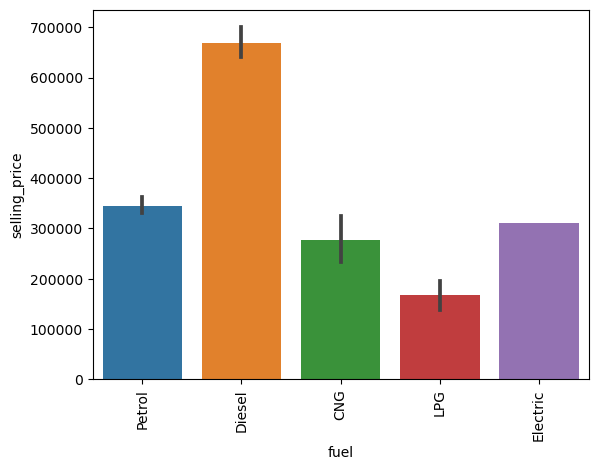

In [57]:
sns.barplot(x=df['fuel'],y=df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

### Diesel Cars is Expensive Whereas Electric is Moderate in price range

In [39]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


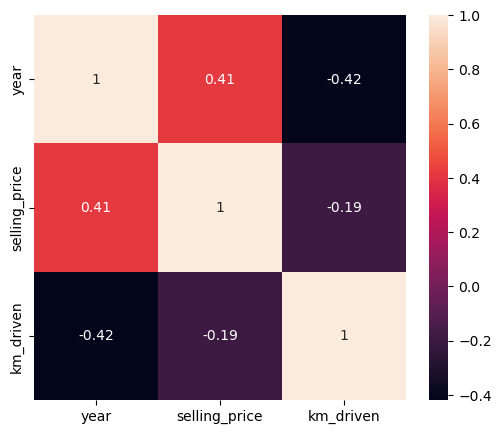

In [48]:
plt.figure(figsize=(6,5))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [68]:
df.head()

,car_make,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [72]:
# Using pandas to perform One-Hot Encoding
car_data_encoded = pd.get_dummies(df, columns=['car_make','fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)


In [90]:
from sklearn.preprocessing import StandardScaler

# Separating the features for PCA
features = car_data_encoded.drop('selling_price', axis=1)  # Exclude target variable if applicable

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(car_data_encoded)


In [83]:
car_data_encoded.head()

,year,selling_price,km_driven,car_make_Audi,car_make_BMW,car_make_Chevrolet,car_make_Datsun,car_make_Fiat,car_make_Ford,car_make_Honda,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [115]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=8)  # Specify the number of principal components you want
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])


In [116]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.09006809 0.07604695 0.04750049 0.04146733 0.0389503  0.03700919
 0.03616041 0.03432376]


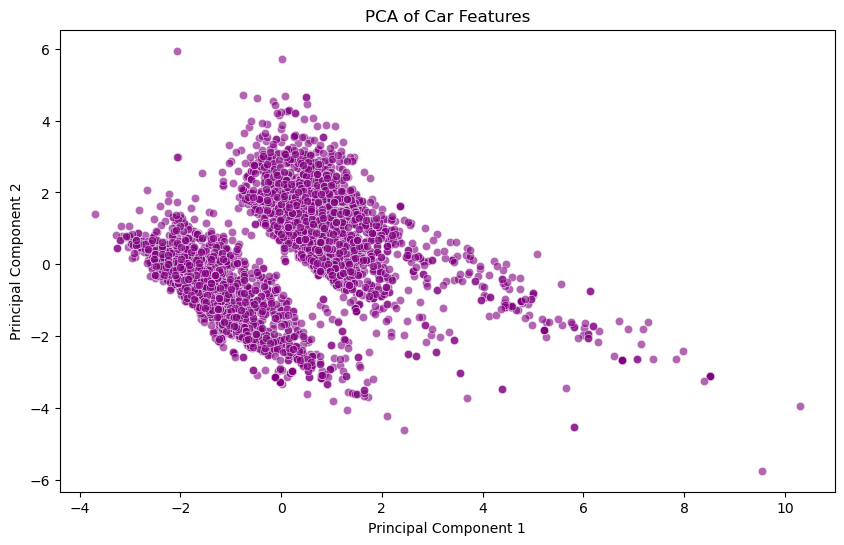

In [86]:
# Plotting the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6, color='purple')
plt.title('PCA of Car Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [117]:
print(pca_df.head())  # Check the DataFrame


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.129824 -0.387203  0.905081 -0.965151  0.006795 -0.339075 -0.412564   
1 -2.048303 -0.601542  0.838506 -0.967994 -0.087183 -0.351092 -0.452512   
2  0.411278  0.838590 -0.499208  1.036373  0.226615  0.750016 -0.150474   
3 -1.187299 -2.004814 -1.294037  0.324930 -1.891558 -0.939719 -0.169152   
4  0.372188  1.636990 -0.310687 -0.007457 -0.007855 -0.168531  1.642310   

        PC8  
0 -0.038073  
1 -0.050822  
2  1.000729  
3 -1.807407  
4 -2.075657  


In [118]:
num_columns = len(df.columns)
num_components = pca.components_.shape[0]

print(f"Number of columns in DataFrame: {num_columns}")
print(f"Number of PCA components: {num_components}")

Number of columns in DataFrame: 9
Number of PCA components: 8


IndexError: index 9 is out of bounds for axis 0 with size 9

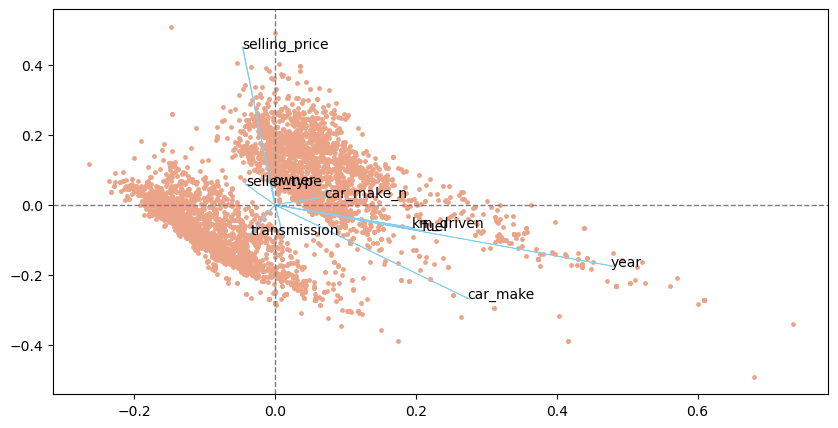

In [119]:
from bioinfokit.visuz import cluster
pca_scores=PCA().fit_transform(pca_df)
cluster.biplot(cscore=pca_scores, loadings=pca.components_, labels=df.columns.values,
              var1=round(pca.explained_variance_ratio_[0]*100,2),
              var2=round(pca.explained_variance_ratio_[1]*100,2),show=True,
              dim=(10,5))

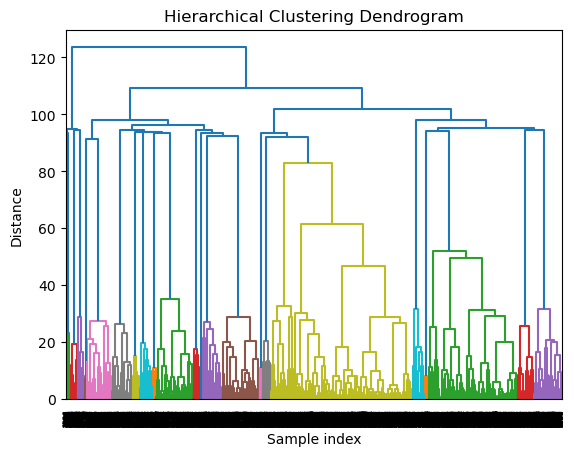

In [94]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute the distance matrix
distance_matrix = pdist(scaled_features, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

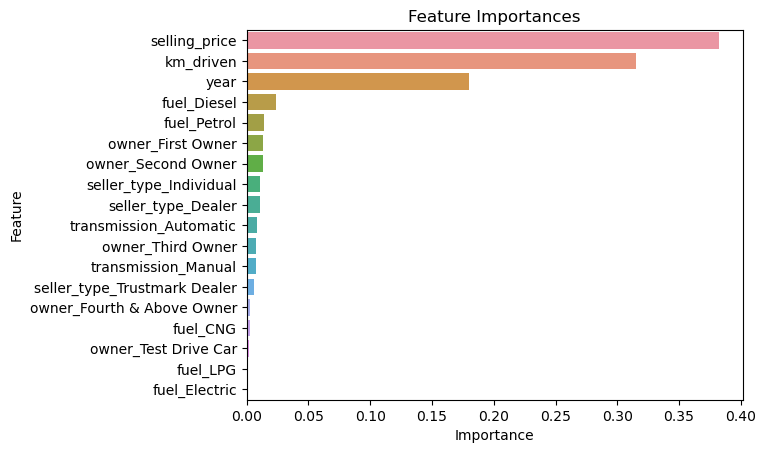

In [98]:
from sklearn.ensemble import RandomForestClassifier


# Convert 'Like' into numerical values
df['car_make_n'] = 6 - df['car_make'].astype('category').cat.codes

# Drop 'Like' and 'Like_n' for feature matrix X
X = df.drop(['car_make','car_make_n'], axis=1)

# Convert categorical variables to dummy/one-hot encoded variables
X = pd.get_dummies(X)

# Target variable
y = df['car_make_n']

# Fit a RandomForest model to cluster data
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


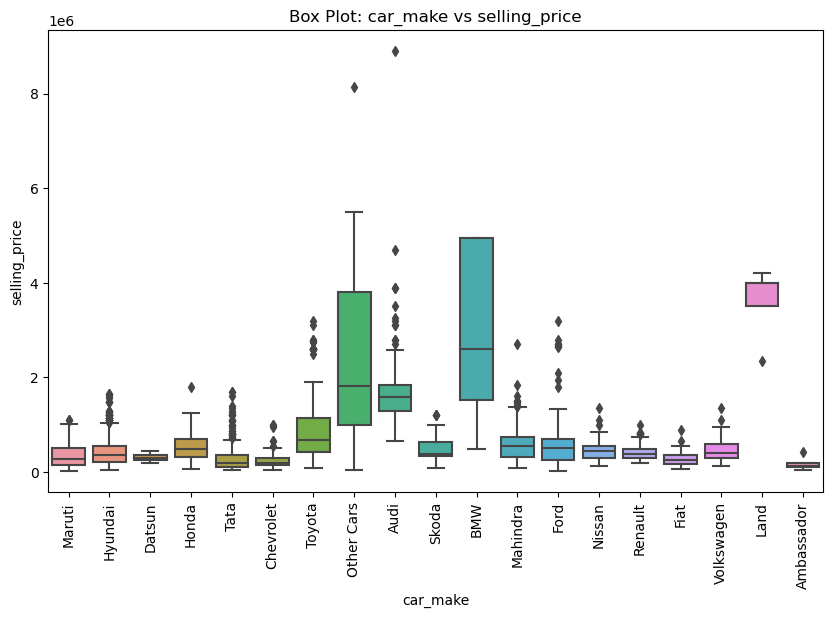

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='car_make', y='selling_price', data=df)
plt.title('Box Plot: car_make vs selling_price')
plt.xticks(rotation='90')
plt.show()